## 1. Import Libraries


In [13]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ultralytics import YOLO

In [14]:
# Function to display an image
def display_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [15]:
# Function to detect players using YOLOv8
def detect_players_yolo(frame, model):
    results = model.predict(frame,conf=0.5)
    return results

In [16]:
# Function to extract dominant colors
def get_dominant_colors(image, k=2):
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))
    # Convert to float
    pixels = np.float32(pixels)
    # Apply KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    # Get the cluster centers
    colors = kmeans.cluster_centers_
    # Convert to integer
    colors = colors.astype(int)
    return colors

In [17]:
# Load the YOLOv8 model
model = YOLO('C:/football-possesion-analysis/model/yolov8mf.pt')

In [18]:
video_path = 'C:/football-possesion-analysis/data/proba.mp4'

In [19]:
cap = cv2.VideoCapture(video_path)


In [20]:
# Read the first frame
ret, frame = cap.read()

In [21]:
# Detect players in the frame
results = detect_players_yolo(frame, model)


0: 480x800 1 ball, 11 players, 1 referee, 95.6ms
Speed: 5.6ms preprocess, 95.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)


In [22]:
# Draw bounding boxes on the frame
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = box.conf[0]
    cls = box.cls[0]
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

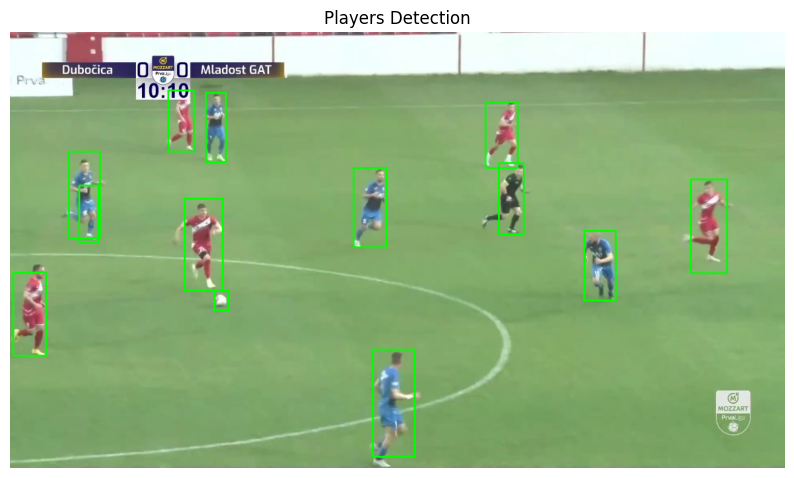

In [23]:
# Display the frame with detections
display_image('Players Detection', frame)

In [24]:
# Extract dominant colors for each detected player
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    player_crop = frame[int(y1):int(y2), int(x1):int(x2)]
    dominant_colors = get_dominant_colors(player_crop, k=2)
    print(f"Dominant Colors for player: {dominant_colors}")

Dominant Colors for player: [[134 147 117]
 [  0 255   0]]
Dominant Colors for player: [[114 179 125]
 [127 113  87]]
Dominant Colors for player: [[138 166 137]
 [ 72 137  54]]
Dominant Colors for player: [[102 106 166]
 [114 188 135]]
Dominant Colors for player: [[143 154 197]
 [ 88 146 122]]
Dominant Colors for player: [[ 98 149 130]
 [208 209 225]]
Dominant Colors for player: [[117 154 155]
 [  0 255   0]]
Dominant Colors for player: [[ 96 163 110]
 [171 158 124]]
Dominant Colors for player: [[101 136 116]
 [  0 254   0]]
Dominant Colors for player: [[182 206 210]
 [100 154 132]]
Dominant Colors for player: [[153 189 165]
 [  0 255   0]]
Dominant Colors for player: [[134 160 130]
 [  0 254   0]]
Dominant Colors for player: [[137 154 125]
 [  0 254   0]]
